# 6.4 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### 01. Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Importing data
path = r'/Users/ngawangdhundup/Documents/Career Foundry Bootcamp/DM 6'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'insurance_clean.csv'), index_col = 0)

In [4]:
df.shape

(1337, 10)

In [7]:
df.head()

age     sex     bmi  children smoker   region      charges  sex_binary  \
0   19  female  27.900         0    yes     West  16884.92400           0   
1   18    male  33.770         1     no    South   1725.55230           1   
2   28    male  33.000         3     no    South   4449.46200           1   
3   33    male  22.705         0     no  Midwest  21984.47061           1   
4   32    male  28.880         0     no  Midwest   3866.85520           1   

   smoker_binary cost_category  
0              1   Middle Cost  
1              0      Low Cost  
2              0      Low Cost  
3              0   Middle Cost  
4              0      Low Cost

In [6]:
df.rename(columns = {'Cost category':'cost_category'}, inplace = True)

In [12]:
print(df.dtypes)

age                int64
sex               object
bmi              float64
children           int64
smoker            object
region            object
charges          float64
sex_binary         int64
smoker_binary      int64
cost_category     object
dtype: object


In [14]:
df2= df[['age', 'sex_binary', 'bmi', 'children', 'smoker_binary', 'charges']]

In [15]:
df2.head()

age  sex_binary     bmi  children  smoker_binary      charges
0   19           0  27.900         0              1  16884.92400
1   18           1  33.770         1              0   1725.55230
2   28           1  33.000         3              0   4449.46200
3   33           1  22.705         0              0  21984.47061
4   32           1  28.880         0              0   3866.85520

### 02. The elbow technique

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/ngawangdhundup/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ngawangdhundup/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ngawangdhundup/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ngawangdhundup/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

[-195939159235.05865,
 -47969960708.416016,
 -22948547309.079575,
 -12118189514.852005,
 -8534185733.466175,
 -6164408972.703007,
 -4432406882.913107,
 -3497806050.502222,
 -2775756752.417093]

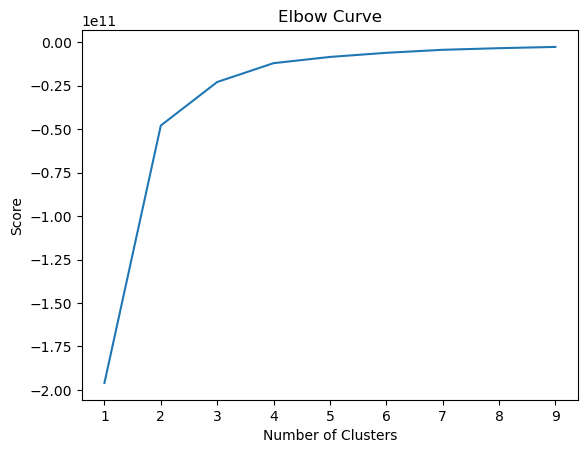

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [22]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [23]:
# Fit the k-means object to the data.

kmeans.fit(df2)

/Users/ngawangdhundup/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [24]:
df2['clusters'] = kmeans.fit_predict(df2)

/Users/ngawangdhundup/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/f1/9l5c1gh11fg31qkvvqmyx9mc0000gn/T/ipykernel_31365/3385428573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusters'] = kmeans.fit_predict(df2)


In [25]:
df2.head()

age  sex_binary     bmi  children  smoker_binary      charges  clusters
0   19           0  27.900         0              1  16884.92400         0
1   18           1  33.770         1              0   1725.55230         1
2   28           1  33.000         3              0   4449.46200         1
3   33           1  22.705         0              0  21984.47061         0
4   32           1  28.880         0              0   3866.85520         1

In [26]:
df2['clusters'].value_counts()

1    905
0    275
2    157
Name: clusters, dtype: int64

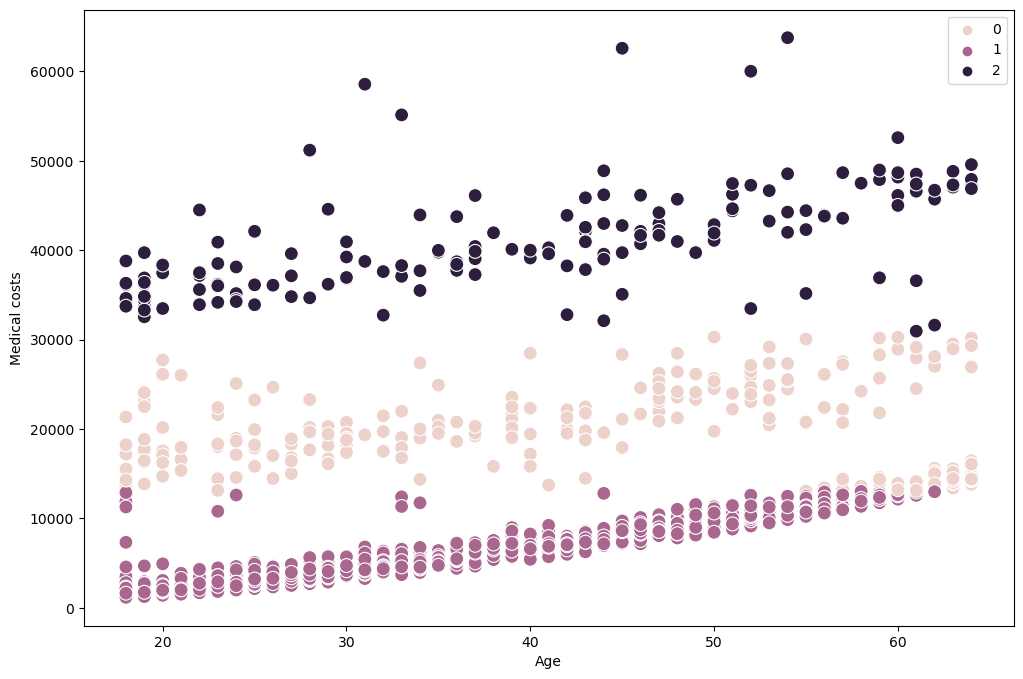

In [29]:
# Plot the clusters for the "charges" and "ages" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['age'], y=df2['charges'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Medical costs') # Label y-axis.
plt.show()

There is a steady increase in medical costs that increase directionaly with age in all 3 clusters. 

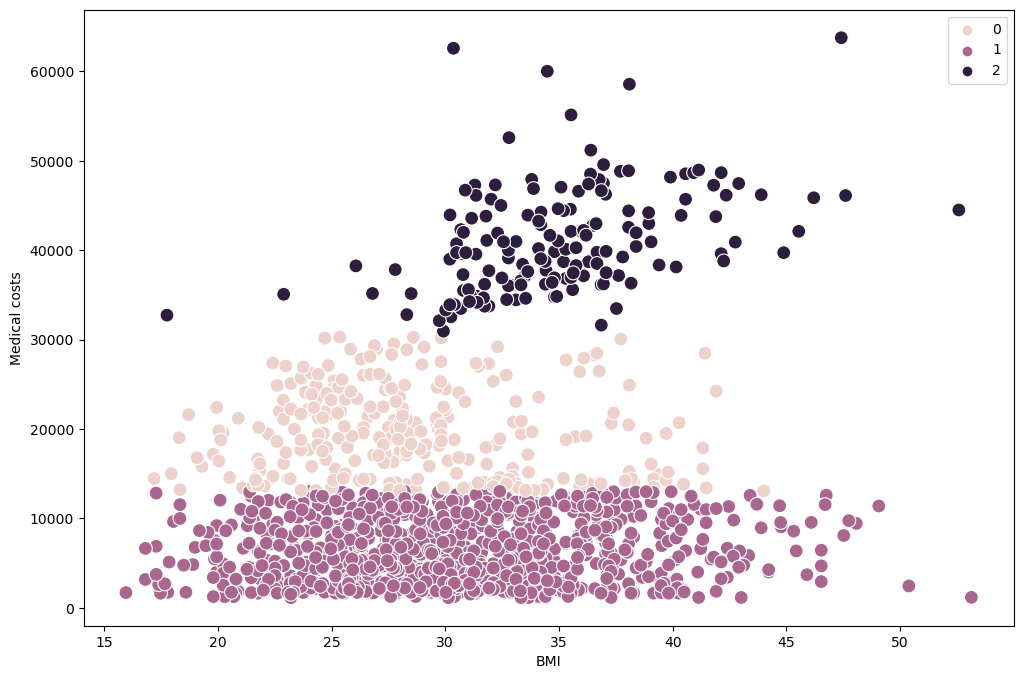

In [30]:
# Plot the clusters for the "charges" and "BMI" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['bmi'], y=df2['charges'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('BMI') # Label x-axis.
plt.ylabel('Medical costs') # Label y-axis.
plt.show()

There is a cluster of people who have high medical costs if they have a bmi of over 30, however it is counteracted by a dense cluster of varying bmis from 15 to 45 that have low medical costs. 

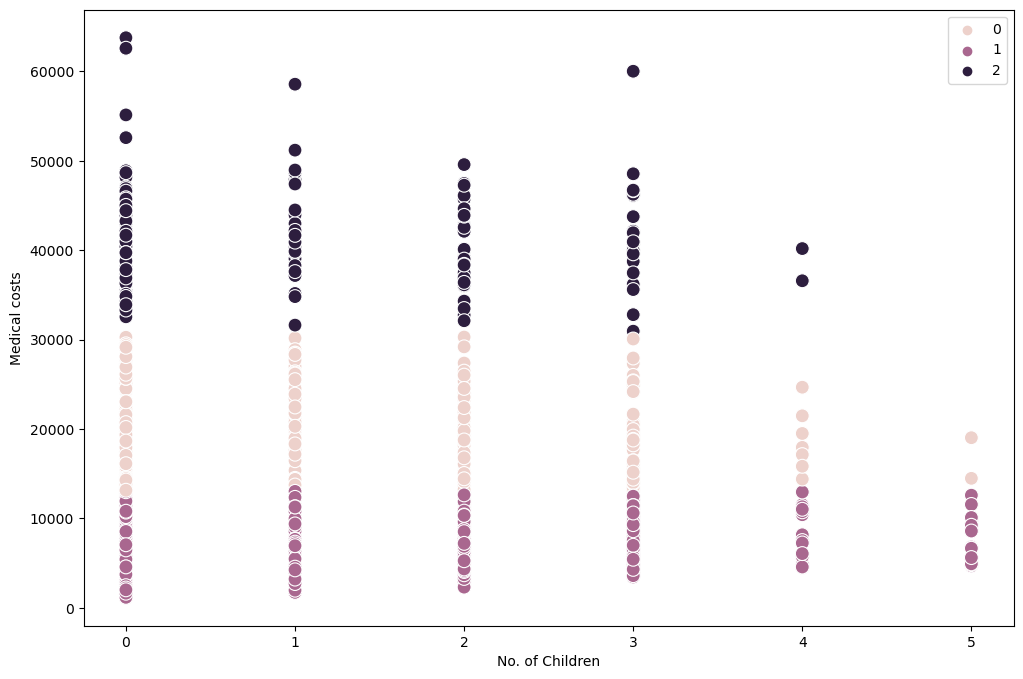

In [31]:
# Plot the clusters for the "charges" and "no. of children" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['children'], y=df2['charges'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('No. of Children') # Label x-axis.
plt.ylabel('Medical costs') # Label y-axis.
plt.show()

there appears to be no significant change in medical costs for number of children up to 3, however it appears after 3 children costs are not as high

In [34]:
df2.loc[df2['clusters'] == 2, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/f1/9l5c1gh11fg31qkvvqmyx9mc0000gn/T/ipykernel_31365/3156325668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['clusters'] == 2, 'cluster'] = 'dark purple'


In [35]:
df2.groupby('cluster').agg({'age':['mean', 'median'], 
                         'bmi':['mean', 'median'], 
                         'children':['mean', 'median'],
                          'charges':['mean', 'median']})

age               bmi         children         \
                  mean median       mean median      mean median   
cluster                                                            
dark purple  39.828025   41.0  35.023917  34.80  1.146497    1.0   
pink         44.585455   47.0  28.710564  27.90  1.109091    1.0   
purple       37.487293   38.0  30.500414  30.14  1.082873    1.0   

                  charges               
                     mean       median  
cluster                                 
dark purple  41097.912181  40003.33225  
pink         19494.673096  18972.49500  
purple        6564.395706   6356.27070

according to the clusters, the dark purple clusters should be the ones we pay attention to since they have the highest mean and median. Pink is second, and purple is last. Surprisingly dark purple did not have the highest age stat, but it did have the highest bmi, meaning BMI may be important. 

The number of children were the same in all 3 clusters so it is negligible. 

In [40]:
df.head()

age     sex     bmi  children smoker   region      charges  sex_binary  \
0   19  female  27.900         0    yes     West  16884.92400           0   
1   18    male  33.770         1     no    South   1725.55230           1   
2   28    male  33.000         3     no    South   4449.46200           1   
3   33    male  22.705         0     no  Midwest  21984.47061           1   
4   32    male  28.880         0     no  Midwest   3866.85520           1   

   smoker_binary cost_category cluster  
0              1   Middle Cost    pink  
1              0      Low Cost  purple  
2              0      Low Cost  purple  
3              0   Middle Cost    pink  
4              0      Low Cost  purple

### Export

In [43]:
df.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'insurance_cluster.csv'))